In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv')
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [5]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [6]:
df.isnull().sum()


Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


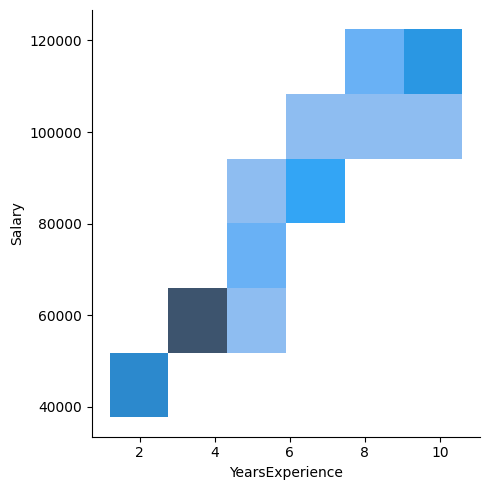

In [7]:
sns.displot(x='YearsExperience', y= 'Salary',data=df)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='YearsExperience', ylabel='Salary'>

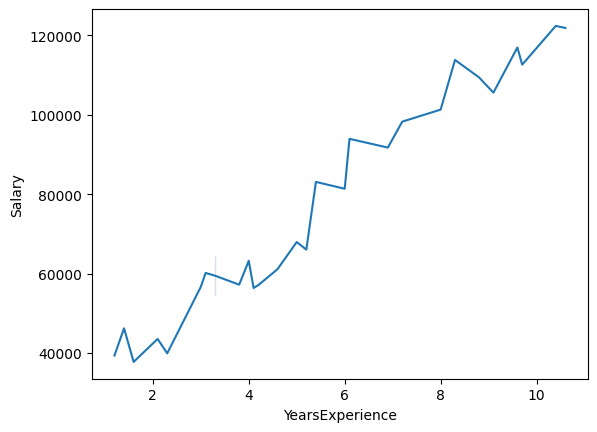

In [8]:
sns.lineplot(x='YearsExperience', y= 'Salary',data=df)

In [9]:
X = df[['YearsExperience']]
y = df['Salary']


In [10]:
X_train , X_test ,y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((24, 1), (24,), (6, 1), (6,))

In [12]:
lr = LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [15]:
y_train_pred[0]

122387.88083899586

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Train MSE :", train_mse)
print("Test MSE :", test_mse)

Train MSE : 27102249.73126133
Test MSE : 49830096.855908394


In [18]:
# r2

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print("Train R2 :", train_r2)
print("Test R2 :", test_r2)

Train R2 : 0.9645401573418148
Test R2 : 0.9024461774180497


In [19]:
traindata = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
testdata = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})


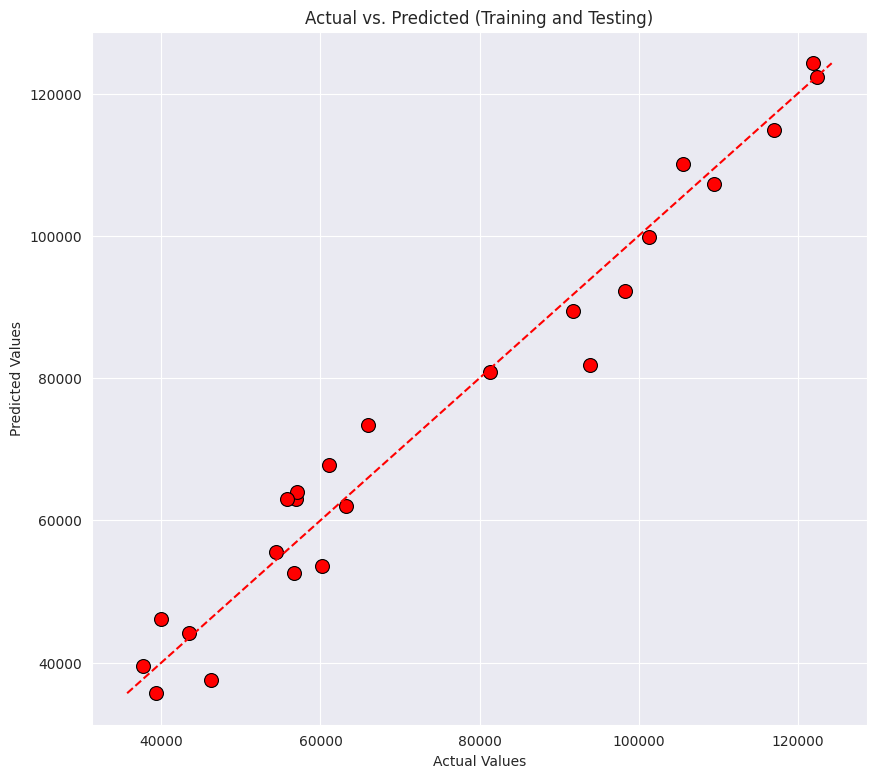

In [20]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,9))
sns.scatterplot(x='Actual', y='Predicted', data=traindata, s= 100, c='red', edgecolor='black')
plt.plot(
    [min(y.min(), y_train_pred.min()) - 1, max(y.max(), y_train_pred.max()) + 1],
    [min(y.min(), y_train_pred.min()) - 1, max(y.max(), y_train_pred.max()) + 1], 
    '--' ,color='red'
)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted (Training and Testing)')


plt.grid(True)
plt.show()

In [21]:
# try polynomial regression
from sklearn.preprocessing import PolynomialFeatures

In [22]:
poly = PolynomialFeatures(degree=2)

In [23]:
poly.fit_transform(X_train,y_train)


array([[  1.  ,  10.4 , 108.16],
       [  1.  ,   8.8 ,  77.44],
       [  1.  ,   4.1 ,  16.81],
       [  1.  ,   1.2 ,   1.44],
       [  1.  ,   2.3 ,   5.29],
       [  1.  ,   5.2 ,  27.04],
       [  1.  ,   3.  ,   9.  ],
       [  1.  ,   4.2 ,  17.64],
       [  1.  ,   4.1 ,  16.81],
       [  1.  ,   8.  ,  64.  ],
       [  1.  ,   1.4 ,   1.96],
       [  1.  ,   1.6 ,   2.56],
       [  1.  ,   9.1 ,  82.81],
       [  1.  ,   2.1 ,   4.41],
       [  1.  ,   7.2 ,  51.84],
       [  1.  ,   9.6 ,  92.16],
       [  1.  ,   6.  ,  36.  ],
       [  1.  ,  10.6 , 112.36],
       [  1.  ,   6.9 ,  47.61],
       [  1.  ,   3.3 ,  10.89],
       [  1.  ,   4.  ,  16.  ],
       [  1.  ,   4.6 ,  21.16],
       [  1.  ,   6.1 ,  37.21],
       [  1.  ,   3.1 ,   9.61]])

In [24]:
y_train_pred = poly.transform(X_train)
y_test_pred = poly.transform(X_test)

In [25]:
y_train

28    122392.0
24    109432.0
12     56958.0
0      39344.0
4      39892.0
16     66030.0
5      56643.0
13     57082.0
11     55795.0
22    101303.0
1      46206.0
2      37732.0
25    105583.0
3      43526.0
21     98274.0
26    116970.0
18     81364.0
29    121873.0
20     91739.0
7      54446.0
10     63219.0
14     61112.0
19     93941.0
6      60151.0
Name: Salary, dtype: float64

In [26]:
print(y_train.shape)
print(y_train_pred.shape)


(24,)
(24, 3)


In [27]:
y_train_pred

array([[  1.  ,  10.4 , 108.16],
       [  1.  ,   8.8 ,  77.44],
       [  1.  ,   4.1 ,  16.81],
       [  1.  ,   1.2 ,   1.44],
       [  1.  ,   2.3 ,   5.29],
       [  1.  ,   5.2 ,  27.04],
       [  1.  ,   3.  ,   9.  ],
       [  1.  ,   4.2 ,  17.64],
       [  1.  ,   4.1 ,  16.81],
       [  1.  ,   8.  ,  64.  ],
       [  1.  ,   1.4 ,   1.96],
       [  1.  ,   1.6 ,   2.56],
       [  1.  ,   9.1 ,  82.81],
       [  1.  ,   2.1 ,   4.41],
       [  1.  ,   7.2 ,  51.84],
       [  1.  ,   9.6 ,  92.16],
       [  1.  ,   6.  ,  36.  ],
       [  1.  ,  10.6 , 112.36],
       [  1.  ,   6.9 ,  47.61],
       [  1.  ,   3.3 ,  10.89],
       [  1.  ,   4.  ,  16.  ],
       [  1.  ,   4.6 ,  21.16],
       [  1.  ,   6.1 ,  37.21],
       [  1.  ,   3.1 ,   9.61]])

In [28]:
poly = PolynomialFeatures(degree=3)  # Choose the degree you want, e.g., 2 for quadratic
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit Linear Regression on polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

# Calculate R² score
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print("Train R2:", train_r2)
print("Test R2:", test_r2)

Train R2: 0.9713086548187267
Test R2: 0.904842988785486


In [29]:
traindata = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
testdata = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})


<Axes: xlabel='Actual', ylabel='Predicted'>

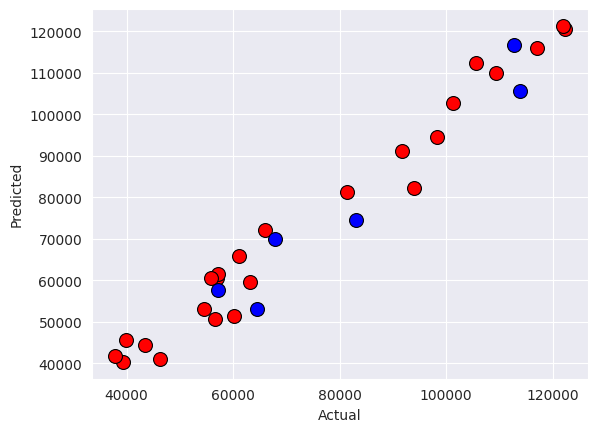

In [30]:
sns.scatterplot(x='Actual', y='Predicted', data=traindata, s= 100, c='red', edgecolor='black')
sns.scatterplot(x='Actual', y='Predicted', data=testdata, s= 100, c='blue', edgecolor='black')

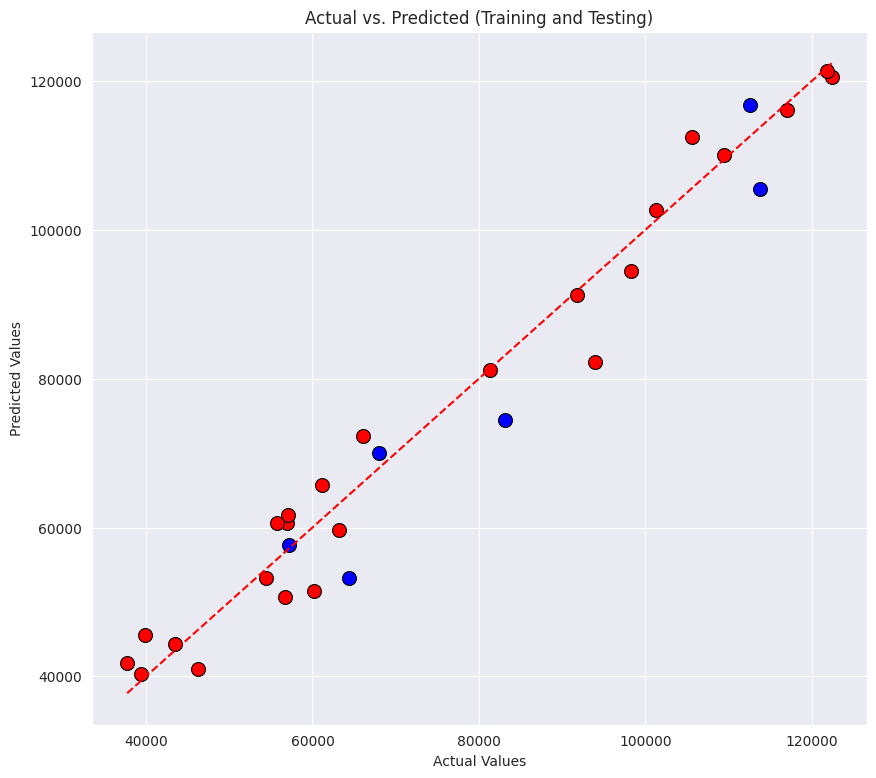

In [31]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,9))
sns.scatterplot(x='Actual', y='Predicted', data=traindata, s= 100, c='red', edgecolor='black')
sns.scatterplot(x='Actual', y='Predicted', data=testdata, s= 100, c='blue', edgecolor='black')
plt.plot(
    [min(y.min(), y_train_pred.min()) - 1, max(y.max(), y_train_pred.max()) + 1],
    [min(y.min(), y_train_pred.min()) - 1, max(y.max(), y_train_pred.max()) + 1], 
    '--' ,color='red'
)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted (Training and Testing)')


plt.grid(True)
plt.show()